### Course: Math 281 - Nonlinear Programming
### Applying Golden Section Search to Gradient Descent via Exact Line Search

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [6]:
#Golden Section Search Method
def gss(f,a,b,max_iter):
    """
    from Saur T. Numerical Analysis
    
    Golden Section Search Method for minimizing f(x)
    Parameters:
    a, b - bounded interval for the function
    max_iter = maximum number of iterations
    f - unimodal function

    """
    gr = (np.sqrt(5)-1)/2 # Golden Ratio
    x1 = a + (1-gr)*(b-a); x2 = a+gr*(b-a)
    f1 = f(x1); f2 = f(x2);

    for i  in range(max_iter):
        if f1 < f2:
            b=x2; x2=x1; x1=a+(1-gr)*(b-a);
            f2=f1; f1=f(x1);
        else:
            a = x1; x1=x2; x2 = a+gr*(b-a);
            f1=f2; f2=f(x2);
        opt = (a+b)/2
    return opt

def gss1(f,a,b,max_iter):
    """
    from Saur T. Numerical Analysis
    
    Golden Section Search Method for minimizing f(x)
    Parameters:
    a, b - bounded interval for the function
    max_iter = maximum number of iterations
    f - unimodal function

    """
    gr = (np.sqrt(5)-1)/2 # Golden Ratio

    for i in range(max_iter):
        if f(a + (1-gr)*(b-a)) < f(a+gr*(b-a)):
            b = a + gr*(b-a)
        else:
            a = a + (1-gr)*(b-a)

    opt = (a+b)/2;
    return opt

def gss2(f,a,b,max_iter):
    '''
    from Bertakas Nonlinear Programming 1999

    Golden Section Search Method for minimizing f(x)
    Parameters:
    a, b - bounded interval for the function
    max_iter = maximum number of iterations
    f - unimodal function

    '''
    tau = (3 - np.sqrt(5)) / 2;
    for i in range(max_iter):
        x1 = a + tau*(b-a)
        x2 = b - tau*(b-a)
        if f(x1) < f(x2):
            if f(a) <= f(x1):
                a = a; b = x1;
            else:
                a = a; b = x2;
        elif f(x1) > f(x2):
            if f(x2) > f(b):
                a = x2; b = b;
            else:
                a = x1; b = b;
        else:
            a = x1; b = x2;

    opt = (a+b)/2
    return opt

In [ ]:
a = 0; b = 5; max_iter = 100
# f = lambda x: x**2 - 4*x + 4
t = np.linspace(0,10,1000)
# f = lambda x: x**6 - 11*x**3 + 17*x**2 - 7*x + 1
# f = lambda x: x**2
f = lambda x: x**2 - 6*x + 15
gr = (np.sqrt(5)-1)/2 # Golden Ratio

alist = [];
blist = [];
optlist = [];
for i  in range(max_iter):
    x1 = a + (1-gr)*(b-a)
    x2 = a+gr*(b-a)
    if f(x1) < f(x2):
        b=x2; x2=x1; x1=a+(1-gr)*(b-a)
    else:
        a = x1; x1=x2; x2 = a+gr*(b-a)
    alist.append(a)
    blist.append(b)
    opt = (a+b)/2
    optlist.append(opt)


plt.subplots(figsize=(16,10))
plt.plot(t,f(t),linestyle="-",linewidth=2.0,color="#000000",label="$f(x) = x^2-6x+15$")
for i in range(np.size(optlist)-1):
    plt.plot(optlist[i], f(optlist[i]),"b*",markersize=10)
plt.plot(optlist[0],f(optlist[0]),"m.",markersize=15)
plt.plot(opt,f(opt),"r.",markersize=15)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(fontsize=14)
plt.show()

In [3]:
##Objective Function and its gradient for testing
def fun(x):
    x1 = x[0].item()
    x2 = x[1].item()
    return (x1-1)**4 + 5*(x2-1)**2 - 2*x1*x2

def grad(x):
  x1 = x[0].item()
  x2 = x[1].item()
  g11 = 4*(x1-1)**3 - 2*x2
  g12 = 10*(x2-1) - 2*x1
  return np.array([g11,g12])



In [21]:
##Gradient Descent
np.random.seed(0)
iter = 0; #Will be used as a counter for the number of iterations
xdict = []; #Will be used to store solutions at each iteration
costlist0 = []; ##
 
##Initialize gradient threshold and maximum number of iterations
max_iter = int(3e+3); grad_threshold = 1e-6

##Initialize Starting Point
x0 = np.array([0,0])


start_time1 = time.time()

for i in range(max_iter):
  xdict.append(x0.copy())
  loss = fun(x0)
  costlist0.append(loss);
  g = -grad(x0)

  ##Using Golden Section Search to find or look for the optimal steplength
  f1 = lambda alpha: fun(x0 - alpha*grad(x0))

  #Constant Steplength:
  # alpha  = 0.01;

  #Exact Line Search:
  alpha = gss(f1,-1,1,150) #(Sauer. T (2011))
  # alpha = gss2(f1,-1,1,150) #(Bertsekas (1999))

  ##Gradient Descent Update
  x = x0 + alpha * g.T
  x0 = x
  ##Stopping Criteria
  if np.linalg.norm(grad(x0)) <= grad_threshold:
    break
  iter = iter + 1

end_time1 = time.time()

xdict = np.array(xdict)
xdict1 = xdict[:,0]
xdict2 = xdict[:,1]

print("Optimal solution:", x0)
print("Number of Iterations:", iter)
print("Function Value is:", fun(x0))
print("Time taken for convergence:", end_time1 - start_time1, "seconds")

Optimal solution: [1.88292608 1.37658513]
Number of Iterations: 11
Function Value is: -3.8672228877127486
Time taken for convergence: 0.05480241775512695 seconds


In [ ]:
for i in range(max_iter):

  ##Using Golden Section Search to find or look for the optimal steplength
  f1 = lambda alpha: fun(x0 - alpha*grad(x0))

  #Exact Line Search:
  alpha = gss(f1,-1,1,150) #(Sauer. T (2011))

  ##Gradient Descent Update
  x = x0 + alpha * g.T
  x0 = x
  ##Stopping Criteria
  if np.linalg.norm(grad(x0)) <= grad_threshold:
    break
  iter = iter + 1

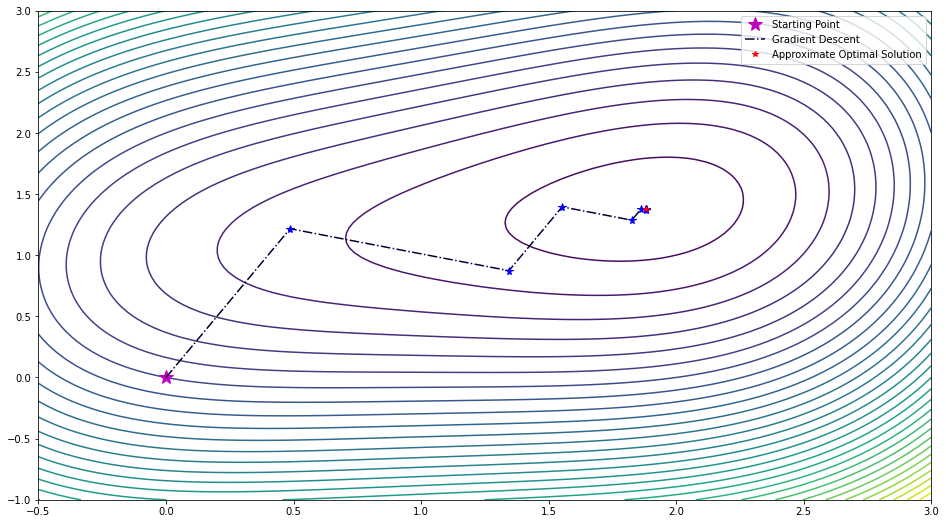

In [20]:
def fplot(x1,x2):
  return (x1-1)**4 + 5*(x2-1)**2 - 2*x1*x2
plt.subplots(figsize=(16,9))
x_ = np.linspace(-0.5,3,100); y_ = np.linspace(-1,3,100)
X,Y = np.meshgrid(x_,y_)
contplot = plt.contour(X,Y,fplot(X,Y),30)

####Plot for Gradient Descent
plt.plot(xdict[0, 0], xdict[0, 1], "m*",markersize=15,label="Starting Point")
plt.plot(xdict1,xdict2,color="#000033",ls="-.",lw=1.5,label="Gradient Descent")
for i in range(1,np.size(xdict1)):
    plt.plot(xdict1[i],xdict2[i],"b*",markersize=8)
plt.plot(x0[0],x0[1],"r*",label="Approximate Optimal Solution")
plt.legend()
plt.show()